<a href="https://colab.research.google.com/github/yesp2002/Time-Series-Analysis/blob/main/Air_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Time Series Analysis and Modeling with the Air Passengers Dataset


Analyze monthly totals of international airline passengers from 1949 to 1960.
ARMA/ARIMA models will be considered in this analysis.




In [16]:
import numpy as np
import pandas as pd

from datetime import datetime as dt

from statsmodels.tsa.stattools import adfuller, acf, pacf

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA


#For Arima we need to pass (p,d,q)
#For Arma we need to pass (p,q)

import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50, 20

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.info()  #To check if our column is in datetime format or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
sum1 = lambda a,b,c: a+b+c

In [6]:
sum1(10,20,73)

103

In [7]:
data.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [8]:
data['Month'] = data['Month'].apply(lambda x: dt(int(x[0:4]), int(x[5:]), 10)) #Here we are converting it into datetime by giveng dt(year, month, some random day)
#apply(function, value)  #datetime(year, month, day, hour, minute, second)
# data = data.set_index('Month')
data

,Month,#Passengers
0,1949-01-10,112
1,1949-02-10,118
2,1949-03-10,132
3,1949-04-10,129
4,1949-05-10,121
...,...,...
139,1960-08-10,606
140,1960-09-10,508
141,1960-10-10,461
142,1960-11-10,390


In [9]:
data.info() #Now converted into datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
data = data.set_index('Month') #Make the month column as index
data

,#Passengers
Month,
1949-01-10,112
1949-02-10,118
1949-03-10,132
1949-04-10,129
1949-05-10,121
...,...
1960-08-10,606
1960-09-10,508
1960-10-10,461


In [11]:
ts = data['#Passengers'] #Considering only pass

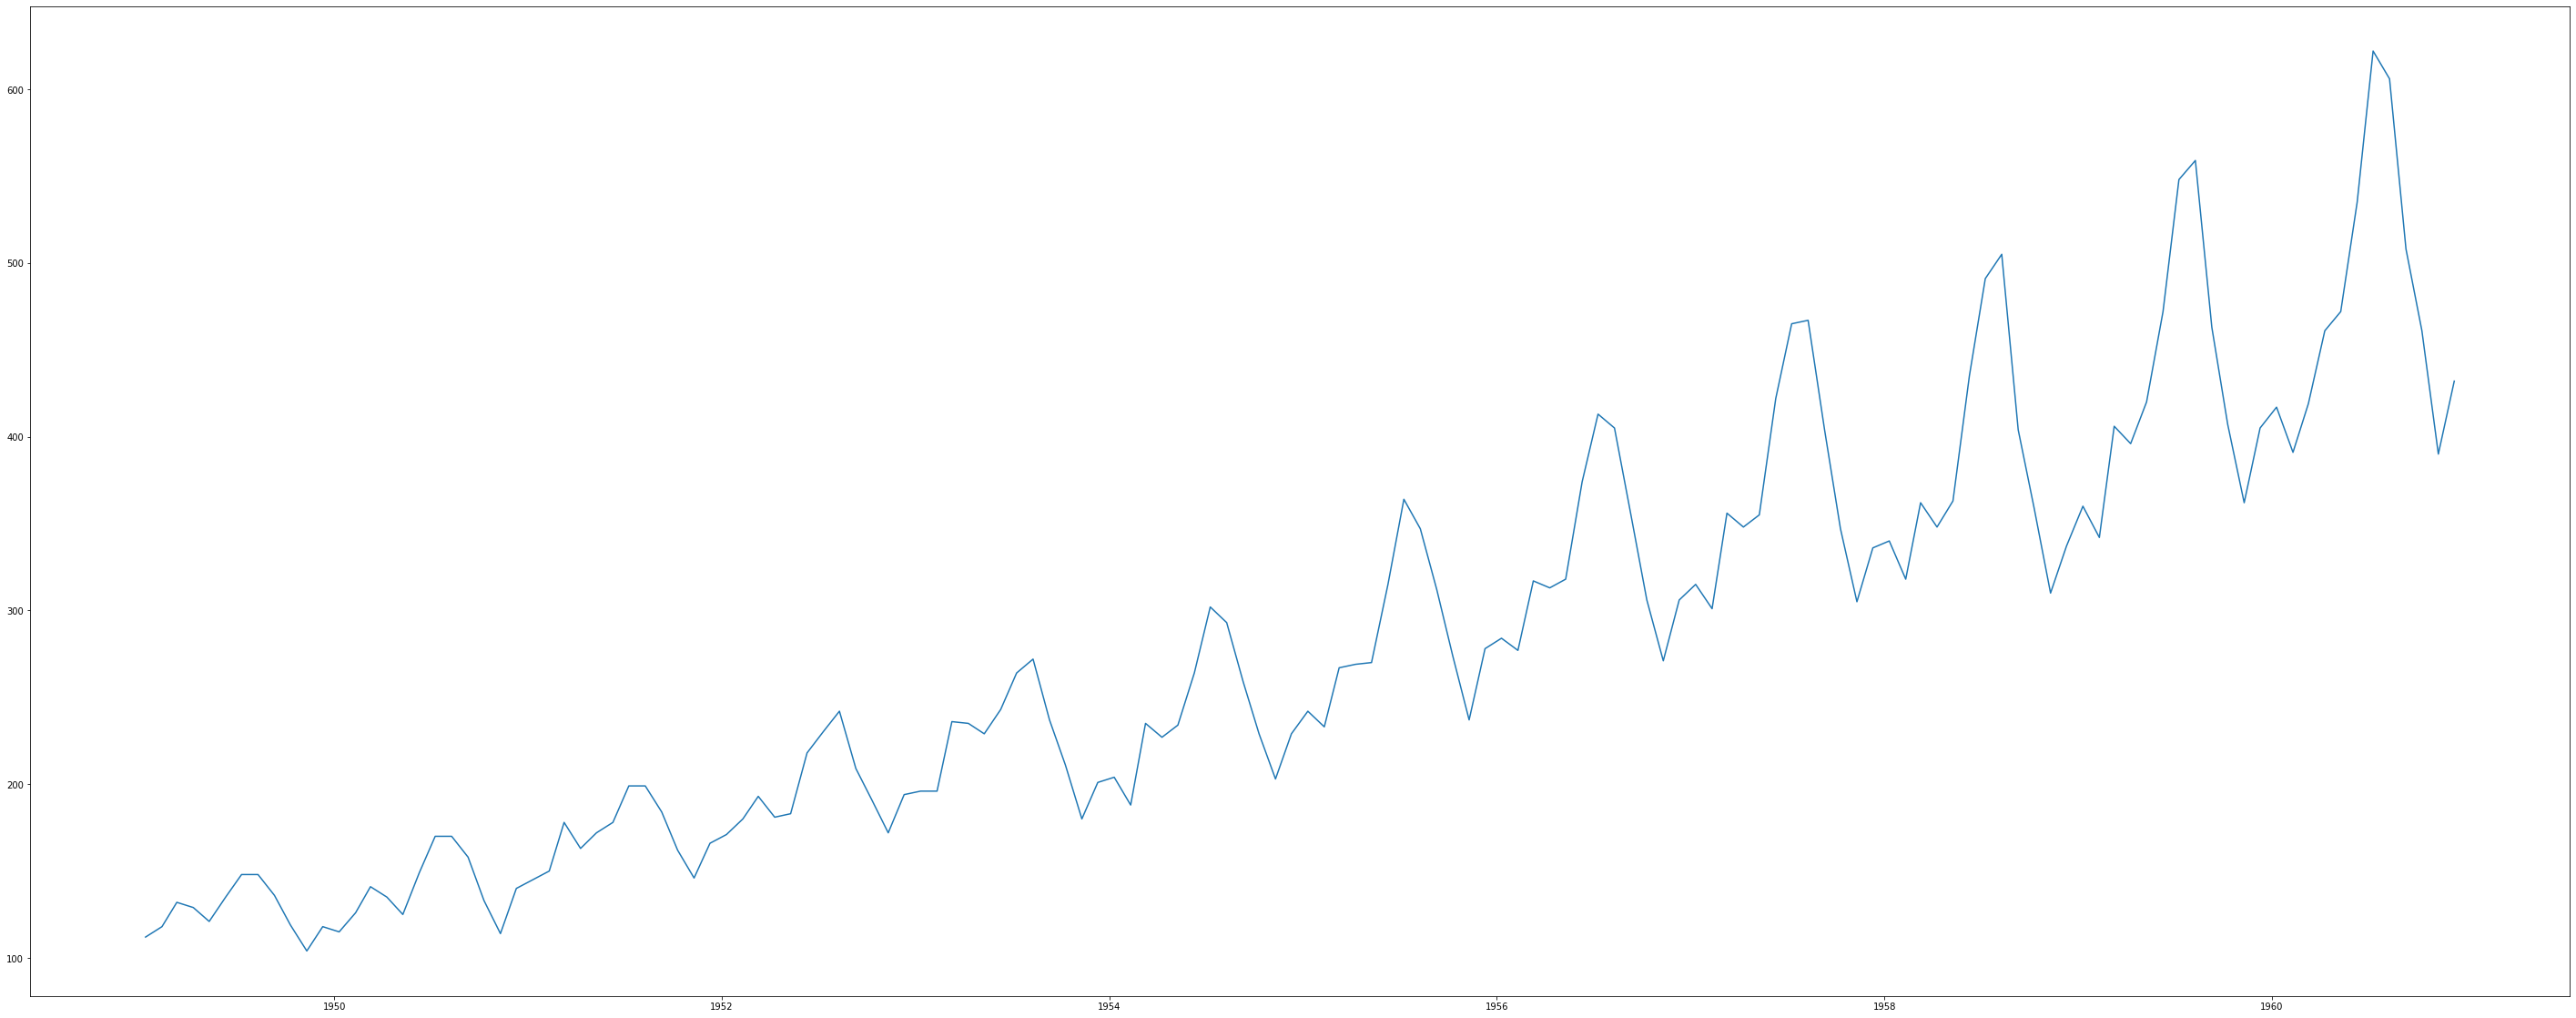

In [17]:
plt.plot(ts)

###  1.1 Observe seasonality and trend in the above graph

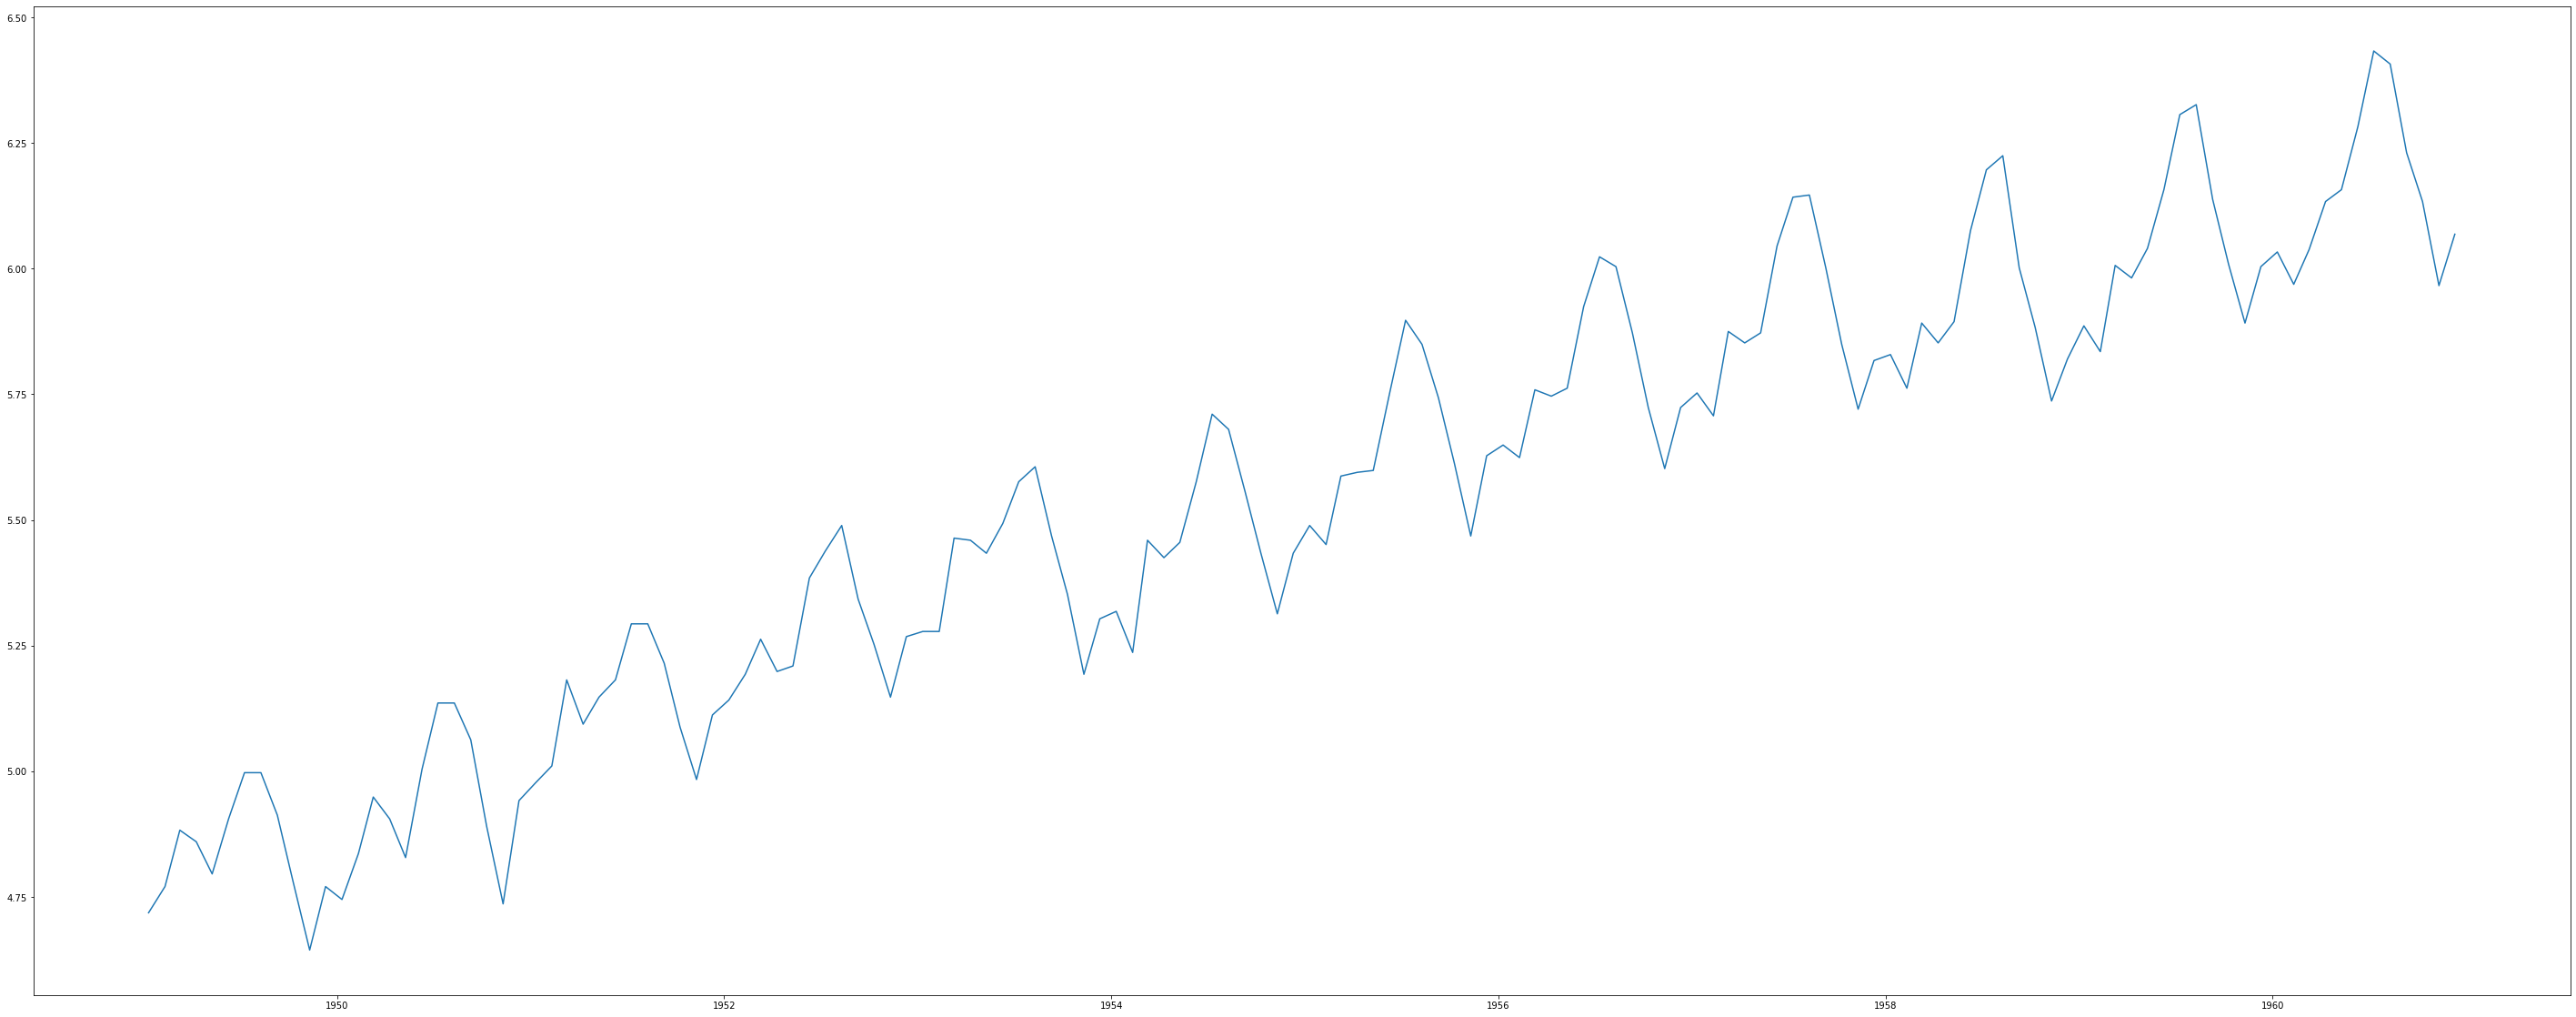

In [18]:
#transformation
ts_log = np.log(ts)
plt.plot(ts_log)

In [19]:
def test_stationarity(timeseries):  #To test stationarity
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() #52 weeks are there in an year, we want to roll over the 52 week
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')  #Shows labels in the best spacing location
    
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False) #Will not block any data
    
    #Perform Dickey-Fuller test: (ADF Test)
    print ('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC') #Akiniki information center(AIC) It will understand the statistical information of the data
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

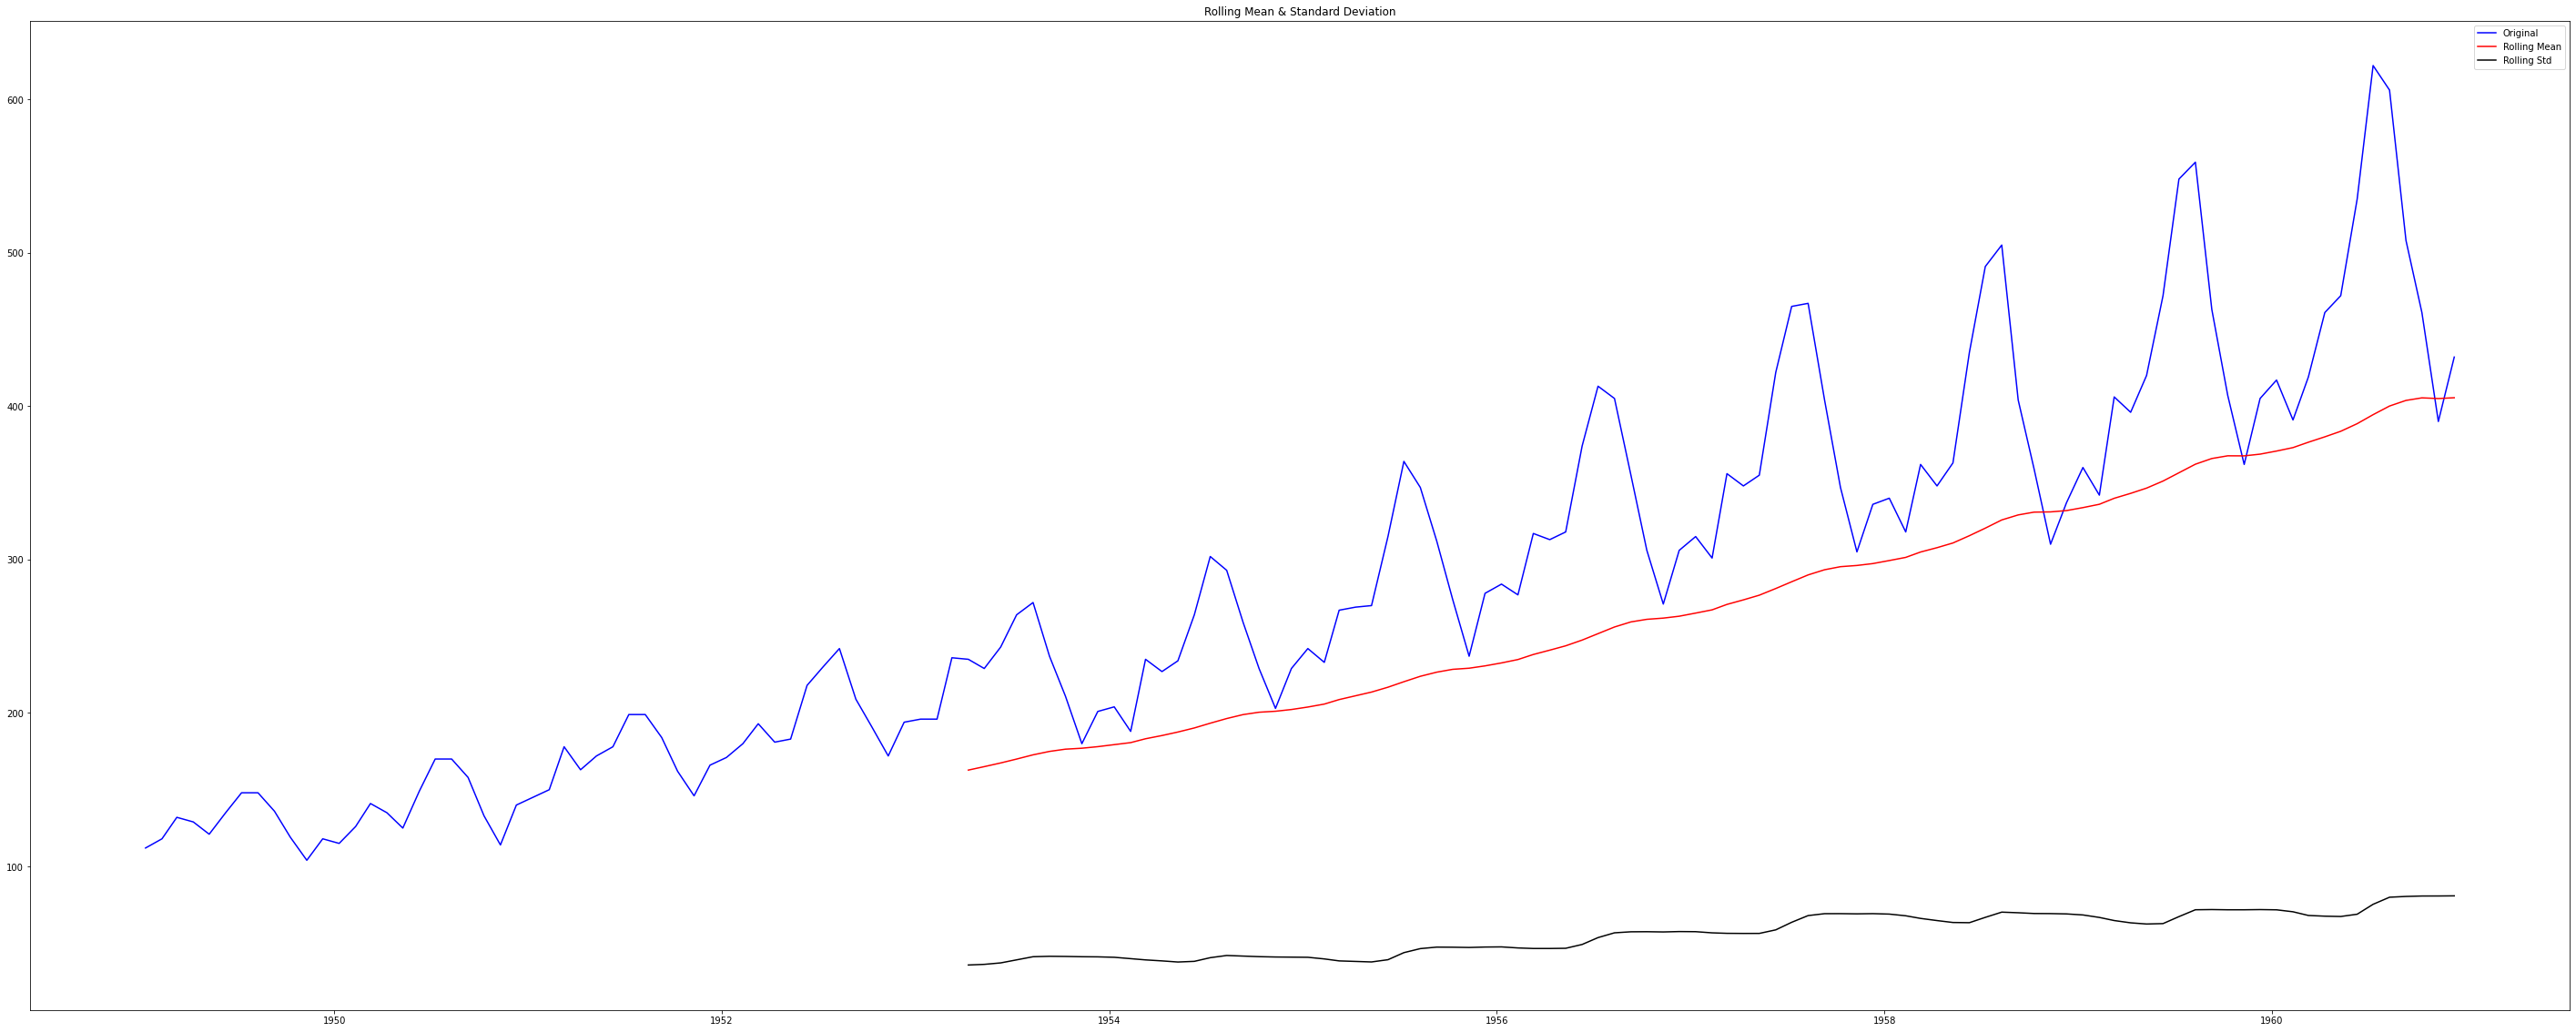

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [20]:
test_stationarity(data['#Passengers'])

### 1.2 The time series is not stationary 

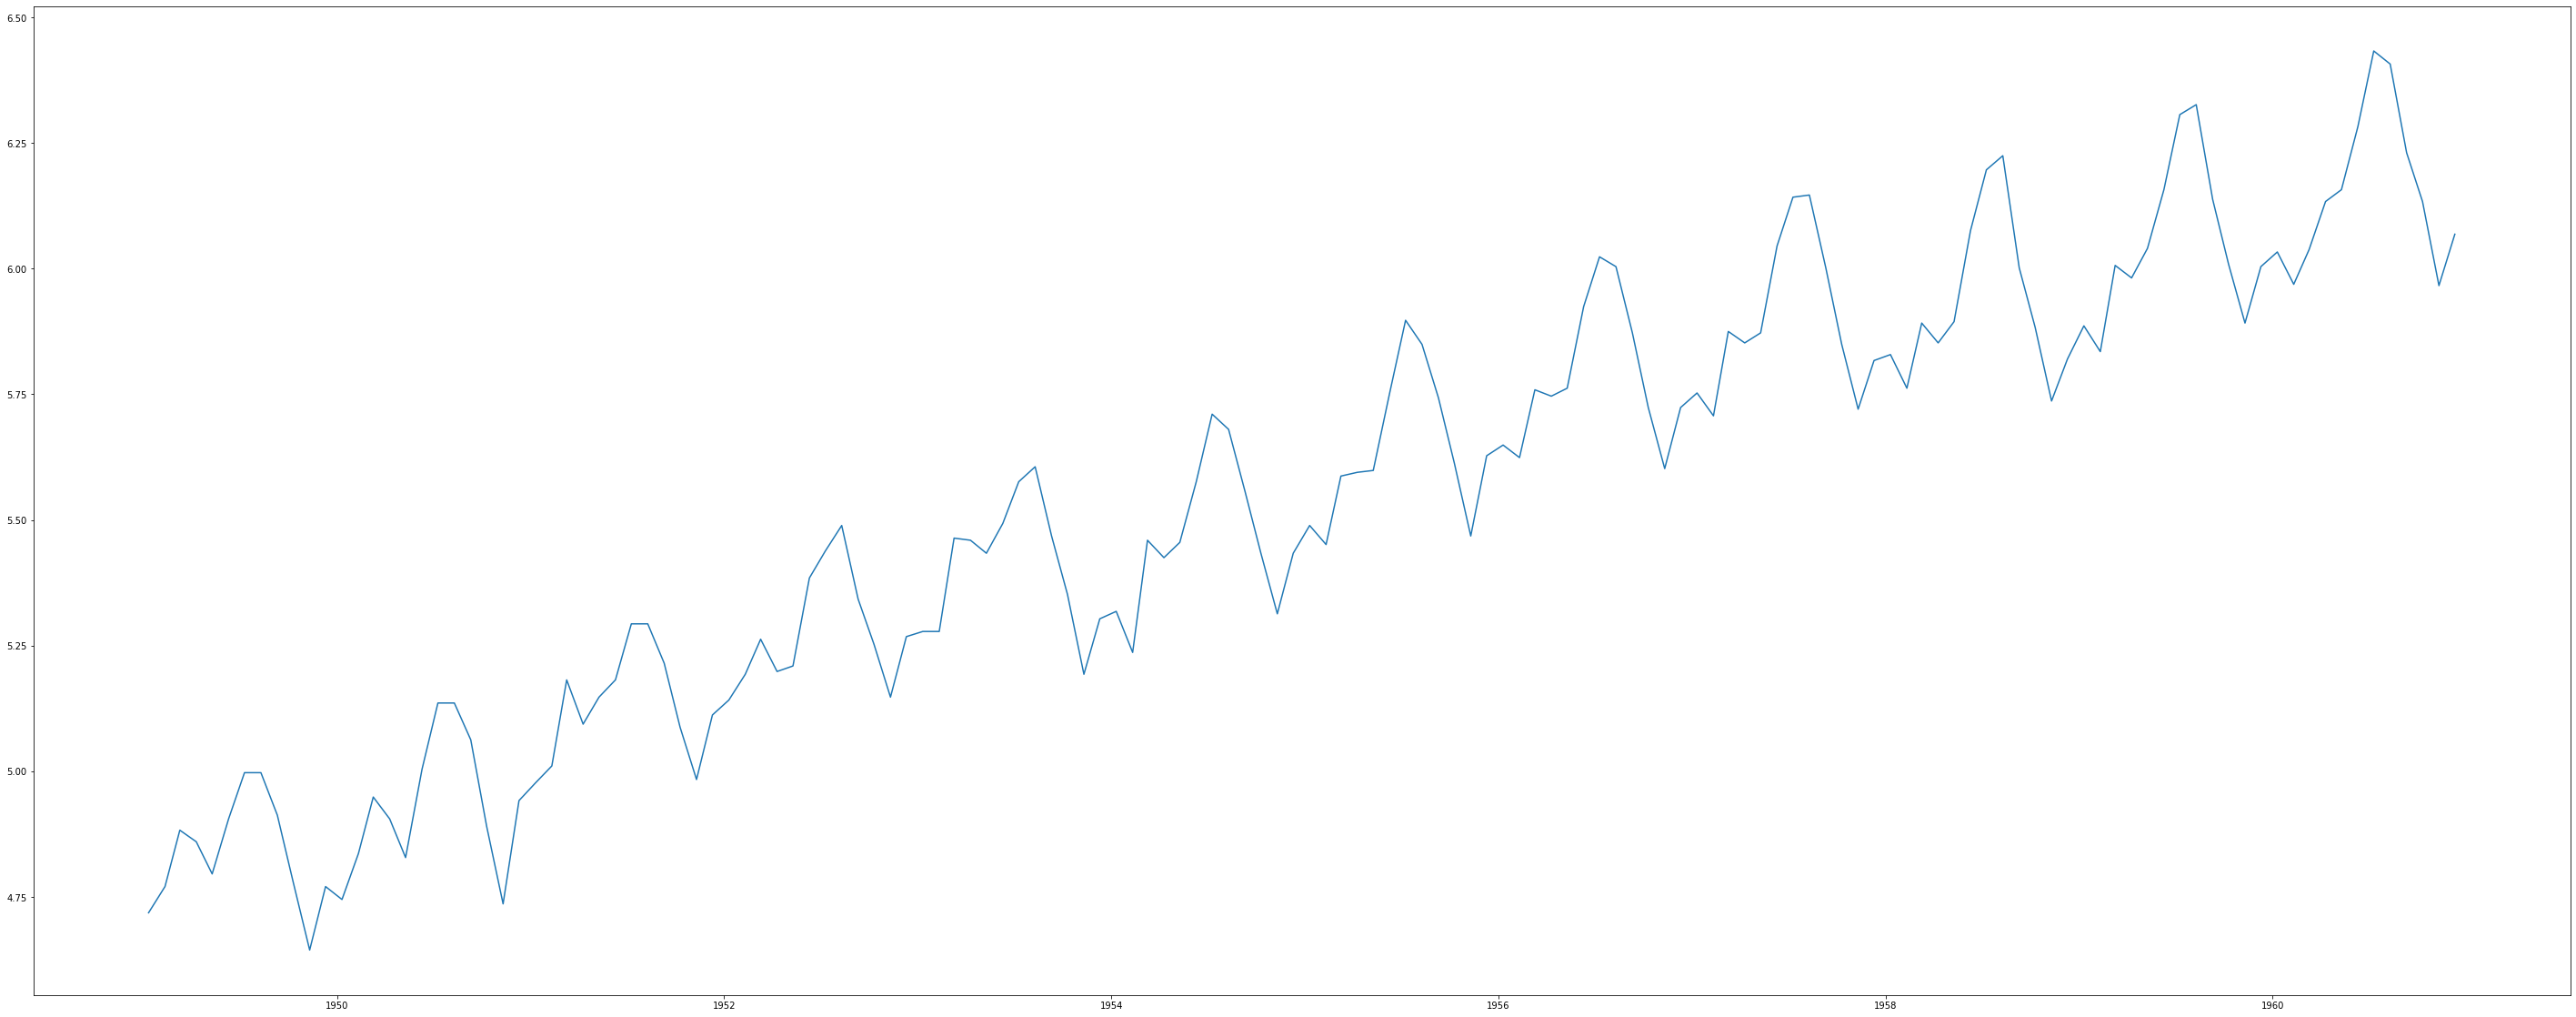

In [21]:
plt.plot(ts_log)

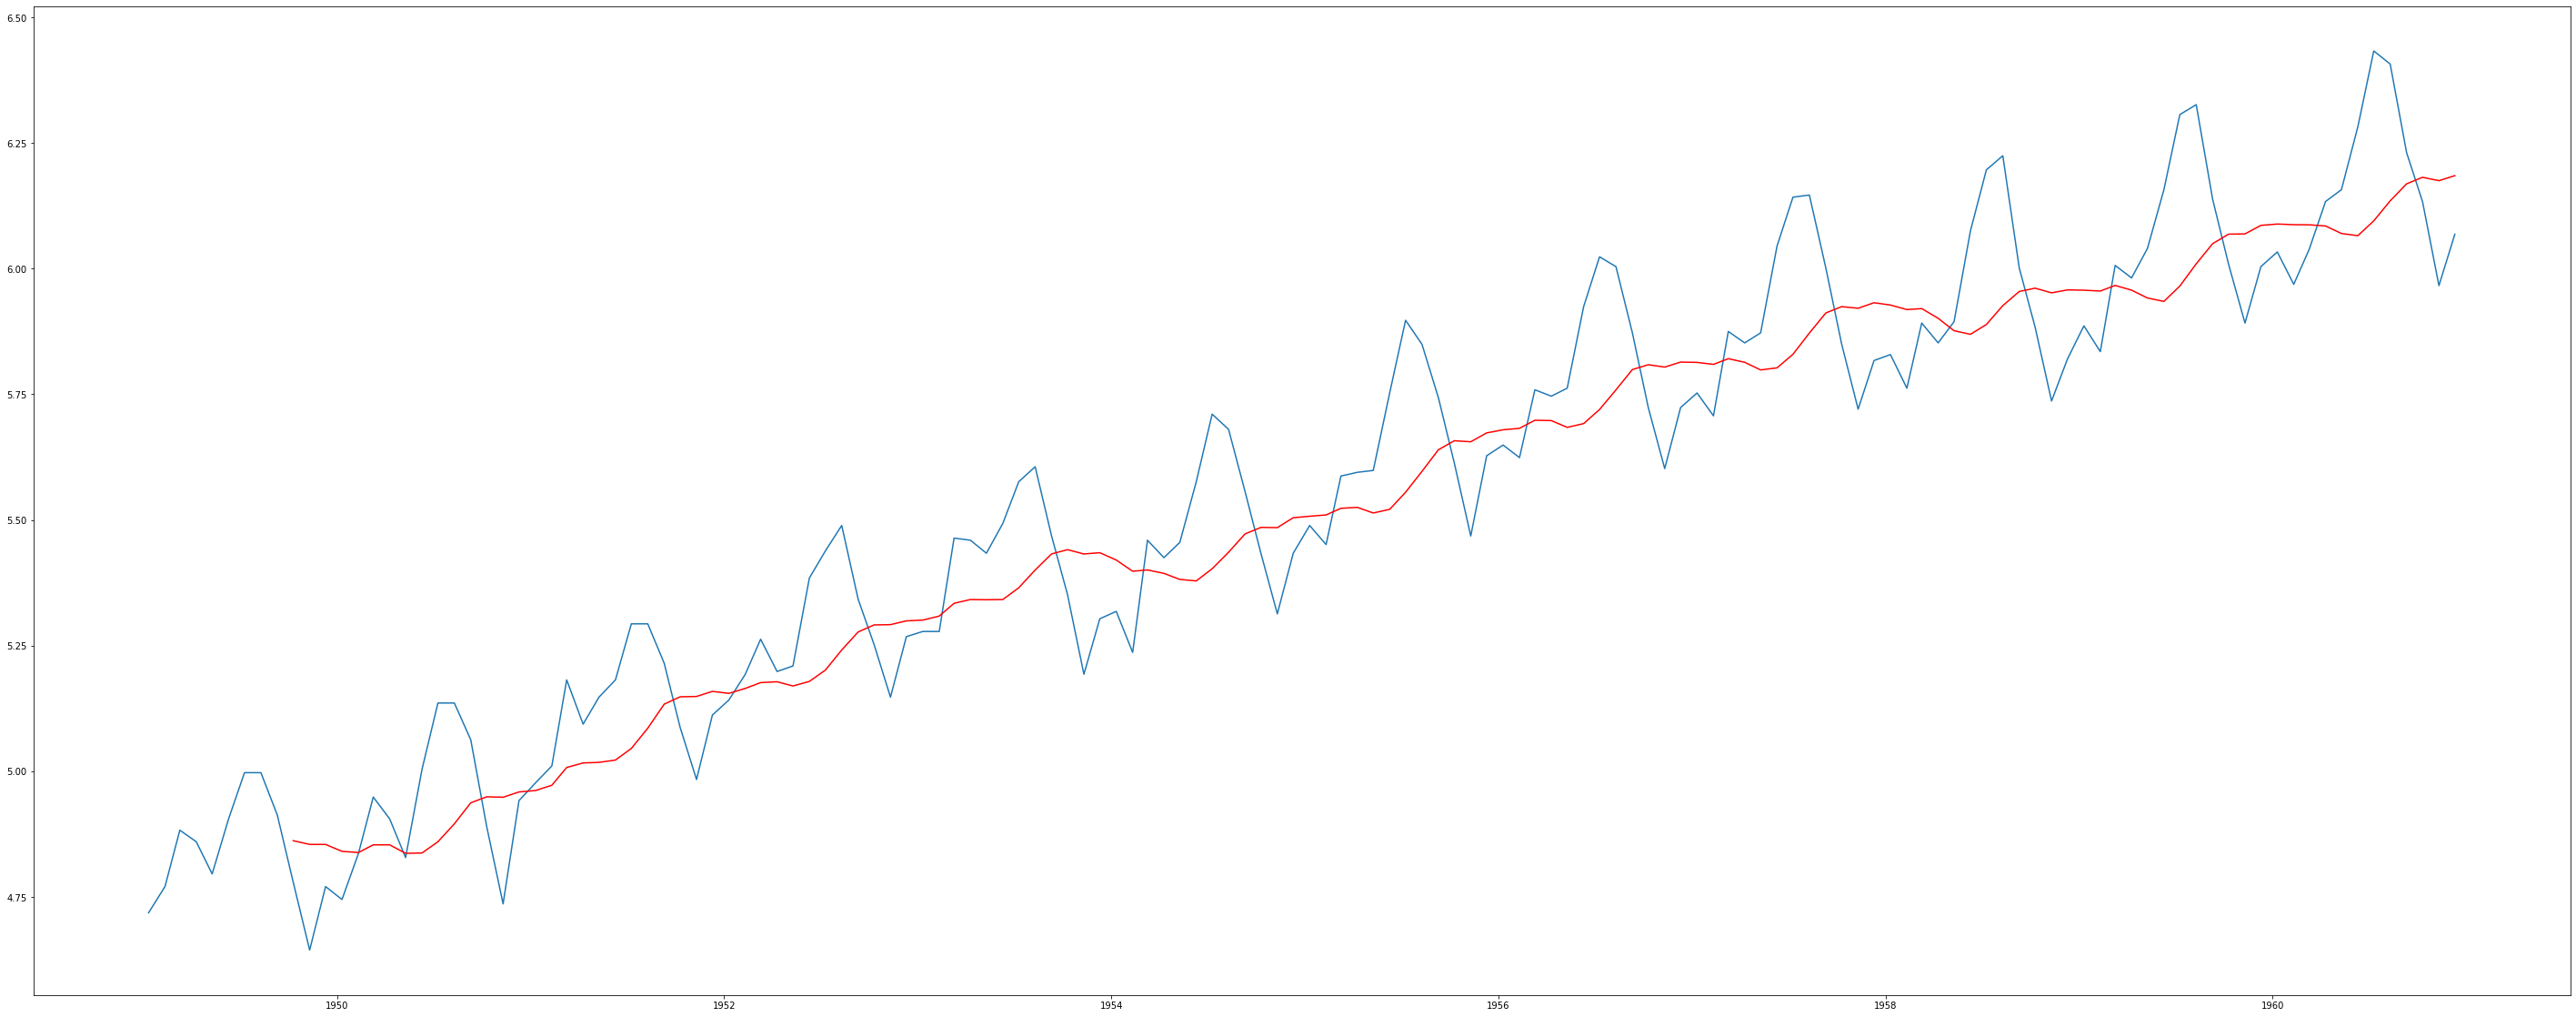

In [27]:
movingAverage = ts_log.rolling(window=10).mean()
movingSTD = ts_log.rolling(window=10).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')

#Not stationary yet

In [28]:
# Get the difference between the moving average and the actual number of passengers
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)
#Remove Nan Values
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-10-10   -0.082783
1949-11-10   -0.210105
1949-12-10   -0.083811
1950-01-10   -0.095777
1950-02-10   -0.002074
1950-03-10    0.095107
1950-04-10    0.051622
1950-05-10   -0.008449
1950-06-10    0.166510
1950-07-10    0.276048
Name: #Passengers, dtype: float64

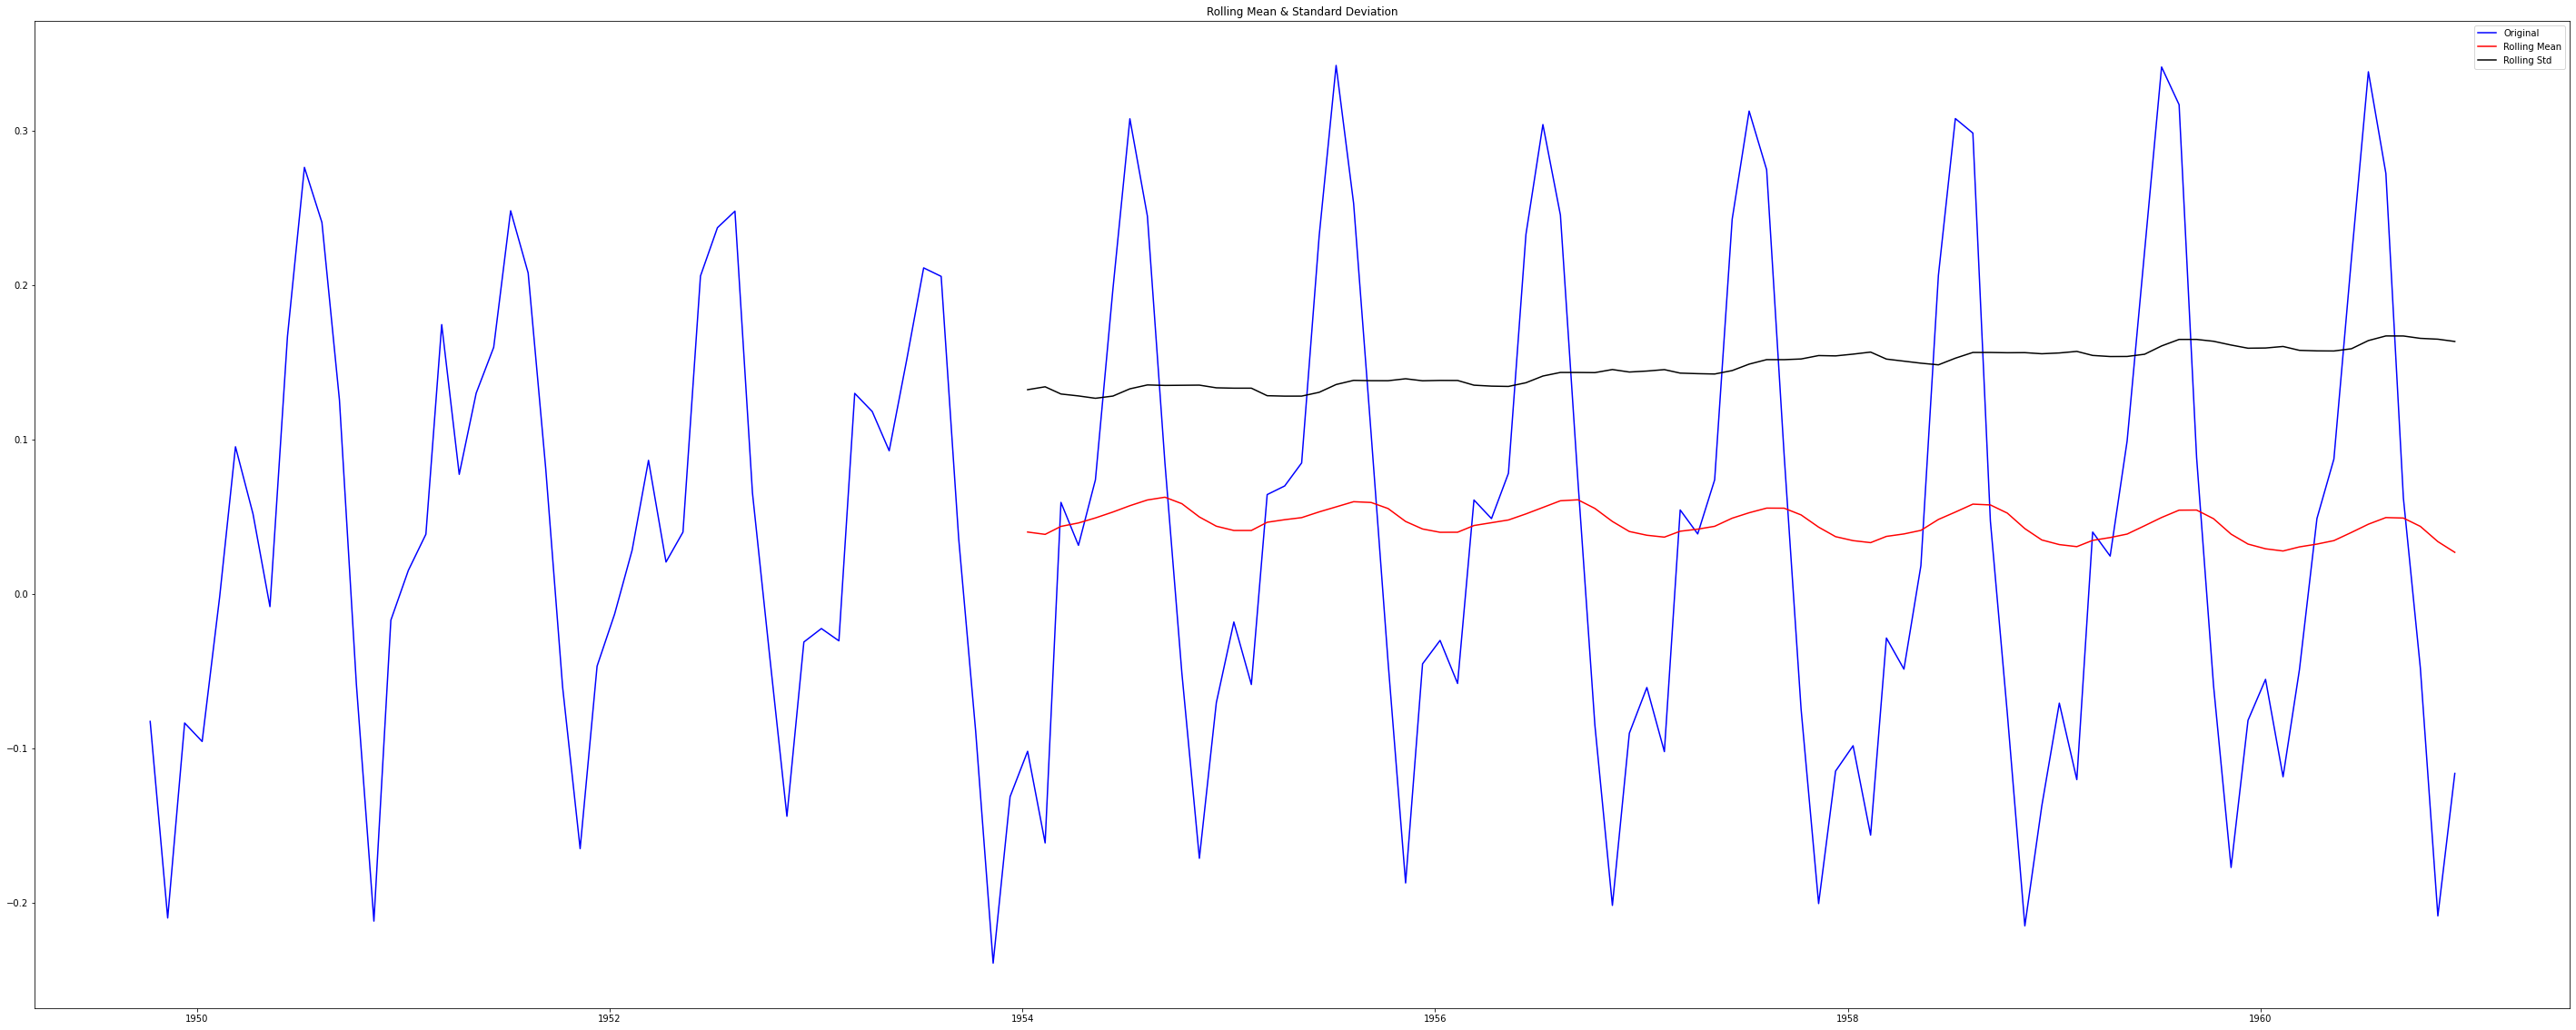

Results of Dickey-Fuller Test:
Test Statistic                  -3.183441
p-value                          0.020963
#Lags Used                      13.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


In [29]:
test_stationarity(ts_log_mv_diff)

#Now it is stationary
#ALso p value < 0.05

###  The time series is now stationary.

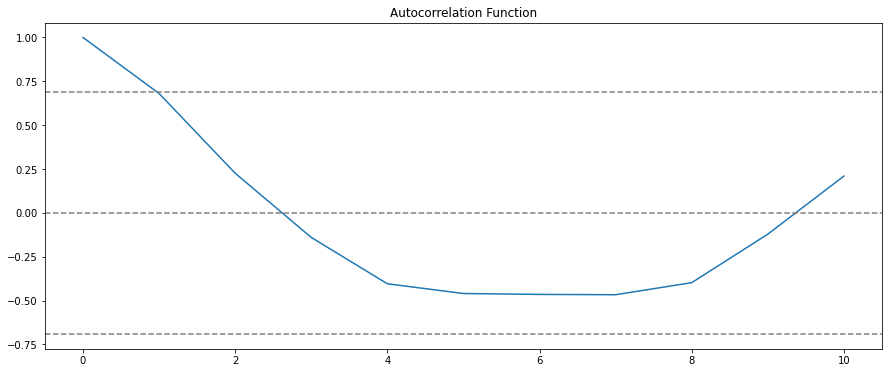

In [ ]:
plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags = 10))  #acf(stationary data, nlags=10) Within 10 we will get q value mostly

plt.axhline(y=0,linestyle='--',color='gray')

plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')

plt.title('Autocorrelation Function')
plt.show()

#Consider q where it touches the positive line
#So q = 1

### The ACF curve crosses the upper confidence value when the lag value is between 0 and 1. Thus, optimal value of q in the ARIMA model must be 0 or 1

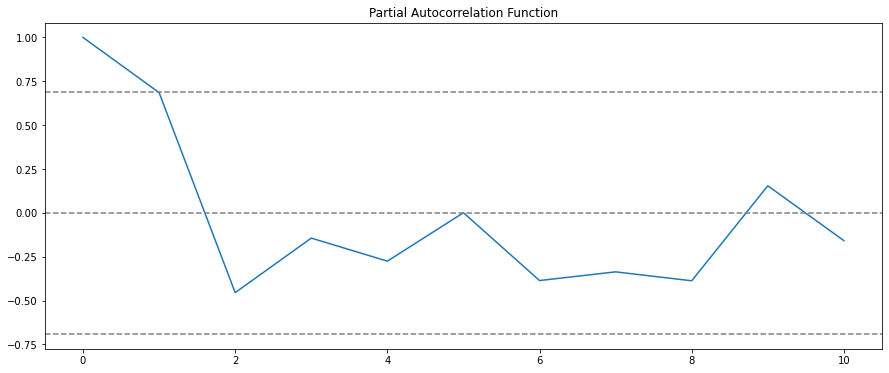

In [ ]:
plt.plot(np.arange(0,11), pacf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

#The slope where it touch falls between 1 and 2

### The PACF curve drops to 0 between lag values 1 and 2. Thus, optimal value of p in the ARIMA model is 1 or 2.

Text(0.5, 1.0, 'RSS: nan')

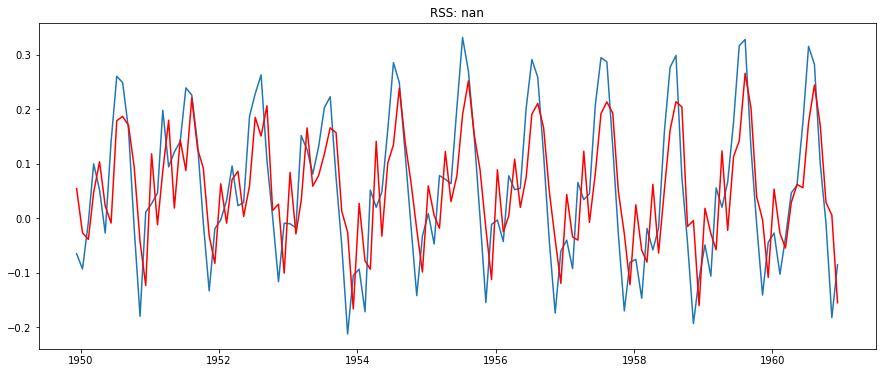

In [ ]:
model = ARIMA(ts_log_mv_diff, order=(1,0, 1))  #p,d,q = 1,0,1
results_ARIMA = model.fit()  

plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2))

Text(0.5, 1.0, 'RSS: nan')

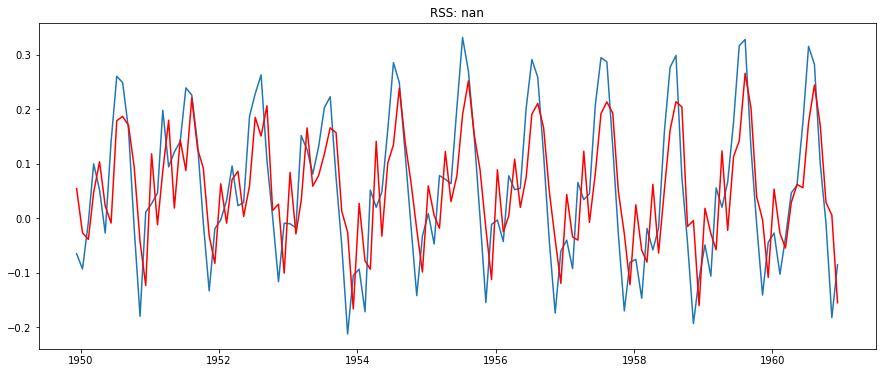

In [ ]:
model = ARMA(ts_log_mv_diff, order=(1, 1))  #p,q = 1,1
results_ARIMA = model.fit()  

plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2))


In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-12-10    0.053983
1950-01-10   -0.026906
1950-02-10   -0.039126
1950-03-10    0.047103
1950-04-10    0.103343
dtype: float64

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

1,2,3,4
1,3,6,10

(1, 3, 6, 10)

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.iloc[0]



0.053982750574569

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log_mv_diff.iloc[0], index=ts_log.index)
predictions_ARIMA_log

Month
1949-01-10   -0.065494
1949-02-10   -0.065494
1949-03-10   -0.065494
1949-04-10   -0.065494
1949-05-10   -0.065494
                ...   
1960-08-10   -0.065494
1960-09-10   -0.065494
1960-10-10   -0.065494
1960-11-10   -0.065494
1960-12-10   -0.065494
Length: 144, dtype: float64

In [ ]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-10   -0.065494
1949-02-10   -0.065494
1949-03-10   -0.065494
1949-04-10   -0.065494
1949-05-10   -0.065494
dtype: float64

Text(0.5, 1.0, 'RMSE: 275.7056')

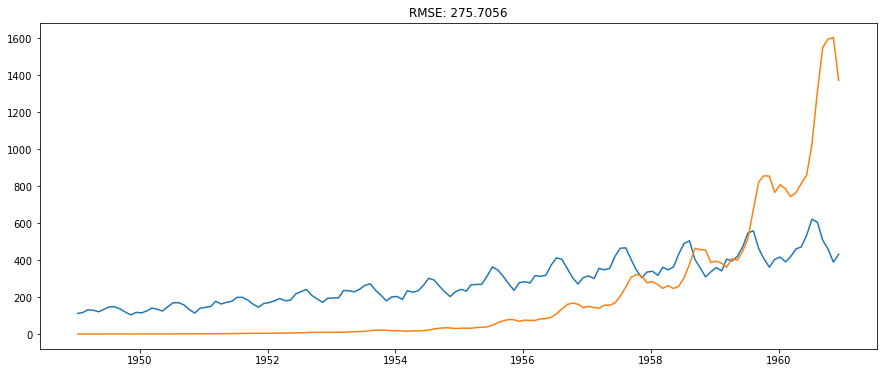

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

### The orange curve is our prediction which has an RMSE of 275.1841. While our model is good at predicting the trend, it fails in capturing the seasonality.